In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import xgboost as xgb
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
from collections import Counter
from sklearn.feature_selection import mutual_info_classif
warnings.filterwarnings('ignore')

%matplotlib inline

# Any results you write to the current directory are saved as output.

['datasete9dc3ed']


Let's explore the dataset given. First let's import the dataset files

In [2]:
train_df = pd.read_csv('../input/datasete9dc3ed/dataset/train.csv')
test_df = pd.read_csv('../input/datasete9dc3ed/dataset/test.csv')
sample_df = pd.read_csv('../input/datasete9dc3ed/dataset/sample_submission.csv')

So this is a classification problem and our goal is to predict column 'P' on the basis of columns 'A'-'O' .  Let's do the exploration here. 

In [3]:
print("Train shape : ", train_df.shape)
print("Test shape : ", test_df.shape)

Train shape :  (552, 17)
Test shape :  (138, 16)


So , We got to know from here is that dataset is not that big. Let's look at the few of the rows. 

In [4]:
train_df.head()

,id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,1,b,18.42,10.415,y,p,aa,v,0.125,t,f,0,f,g,120.0,375,1
1,2,a,21.75,11.750,u,g,c,v,0.250,f,f,0,t,g,180.0,0,1
2,3,b,30.17,1.085,y,p,c,v,0.040,f,f,0,f,g,170.0,179,1
3,4,b,22.67,2.540,y,p,c,h,2.585,t,f,0,f,g,0.0,0,0
4,5,a,36.00,1.000,u,g,c,v,2.000,t,t,11,f,g,0.0,456,0


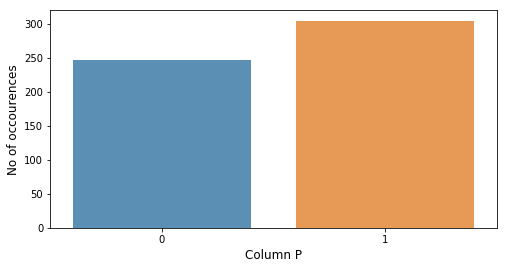

In [5]:
cnt_srs = train_df['P'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column P',fontsize = 12)
plt.show()

And the nice part about data is it is not skewed with one class. It is a good classification problem. 
Now let's more analyze the dataset and let's find the key points from it.  Let's check for the no of null values in the data, and how each column's values are distributed. 
## Describing the Dataset

In [6]:
train_df.describe()

,id,B,C,H,K,N,O,P
count,552.000000,543.000000,552.000000,552.000000,552.000000,541.000000,552.000000,552.000000
mean,276.500000,31.364899,4.780136,2.259176,2.318841,175.162662,1087.576087,0.552536
std,159.492947,11.873665,4.938454,3.442564,4.297867,154.873746,5758.841945,0.497683
min,1.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,138.750000,22.500000,1.000000,0.165000,0.000000,60.000000,0.000000,0.000000
50%,276.500000,28.170000,2.750000,1.000000,0.000000,152.000000,3.500000,1.000000
75%,414.250000,37.665000,7.561250,2.750000,3.000000,268.000000,364.750000,1.000000
max,552.000000,80.250000,28.000000,28.500000,40.000000,1160.000000,100000.000000,1.000000


## Dataset Info
Let's look at the info of training and test set. this will tell us if null values are present in the data and also the datatype of each column.

In [7]:
print("Train Data Info :- ")
print(train_df.info())
print("Test Data Info :- ")
print(test_df.info())

Train Data Info :- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 17 columns):
id    552 non-null int64
A     544 non-null object
B     543 non-null float64
C     552 non-null float64
D     547 non-null object
E     547 non-null object
F     545 non-null object
G     545 non-null object
H     552 non-null float64
I     552 non-null object
J     552 non-null object
K     552 non-null int64
L     552 non-null object
M     552 non-null object
N     541 non-null float64
O     552 non-null int64
P     552 non-null int64
dtypes: float64(4), int64(4), object(9)
memory usage: 73.4+ KB
None
Test Data Info :- 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 16 columns):
id    138 non-null int64
A     134 non-null object
B     135 non-null float64
C     138 non-null float64
D     137 non-null object
E     137 non-null object
F     136 non-null object
G     136 non-null object
H     138 non-null float64
I    

No of null values in each column of training data and test data and also look at distribution.

## Column 'A' analysis- 

Percentage of null values in Column A of training set 1.45
Percentage of null values in Column A of test set 2.90


 Distribution of training set data 




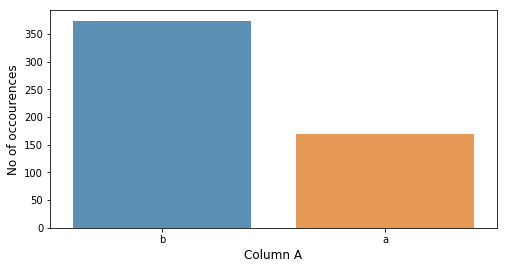



 Distribution of test set data 




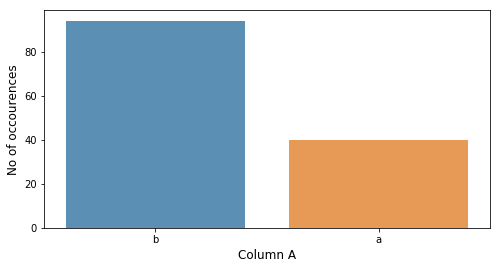

In [8]:
t = train_df['A'].isnull().sum()/552*100
print("Percentage of null values in Column A of training set "+ "{:.2f}".format(t))
print("Percentage of null values in Column A of test set "+ "{:.2f}".format(test_df['A'].isnull().sum()/138*100))
print("\n\n Distribution of training set data \n\n")
cnt_srs = train_df['A'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column A',fontsize = 12)
plt.show()

print("\n\n Distribution of test set data \n\n")
cnt_srs = test_df['A'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column A',fontsize = 12)
plt.show()





This is a very nice observation, means how training and test data is designed is amazing. In training data **1.45%** of column A values are null and in test data exactly double that is** 2.90% ** of values are null. Also the distribution of variables in train and test is also following almost same trend. Let's take our decision and **fill the missing values with 'b' as they are more in occourences. **


In [9]:
train_df['A'].fillna('b',inplace=True)
test_df['A'].fillna('b',inplace=True)

## Column B Analysis
Let's draw the distribution of column B and found out how we should full the missing values in that. 



Percentage of null values in Column B of training set 1.63
Percentage of null values in Column B of test set 2.17


 Distribution of training set data 




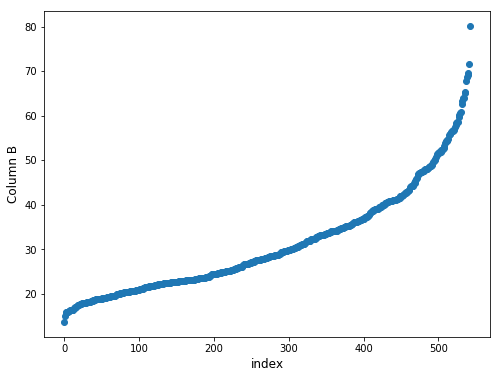



 Distribution of test set data 




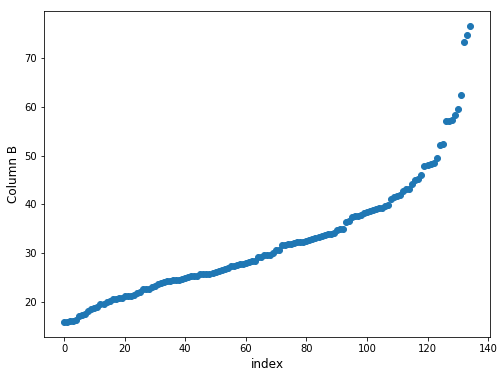

In [10]:
t = train_df['B'].isnull().sum()/552*100
print("Percentage of null values in Column B of training set "+ "{:.2f}".format(t))
print("Percentage of null values in Column B of test set "+ "{:.2f}".format(test_df['B'].isnull().sum()/138*100))
print("\n\n Distribution of training set data \n\n")

plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.B.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Column B', fontsize=12)
plt.show()

print("\n\n Distribution of test set data \n\n")

plt.figure(figsize=(8,6))
plt.scatter(range(test_df.shape[0]), np.sort(test_df.B.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Column B', fontsize=12)
plt.show()

Again percentage of null values in test data is almost double the percentage of null values in training data. And also the distribution is almost same. Let's fill the null values with median as filling with medium is one of the best method.  Let's remove the **outlier** also.

In [11]:
ulimit = np.percentile(train_df.B.values, 99)
llimit = np.percentile(train_df.B.values, 1)
train_df['B'].ix[train_df['B']>ulimit] = ulimit
train_df['B'].ix[train_df['B']<llimit] = llimit

ulimit = np.percentile(test_df.B.values, 99)
llimit = np.percentile(test_df.B.values, 1)
test_df['B'].ix[test_df['B']>ulimit] = ulimit
test_df['B'].ix[test_df['B']<llimit] = llimit

In [12]:
train_df['B'].fillna(train_df['B'].median(),inplace=True)
test_df['B'].fillna(test_df['B'].median(),inplace=True)

## Column C Analysis


Percentage of null values in Column B of training set 0.00
Percentage of null values in Column B of test set 0.00


 Distribution of training set data 




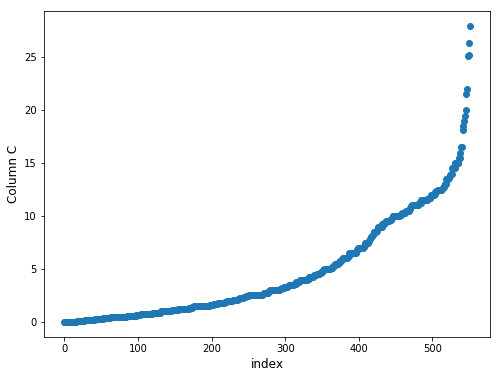



 Distribution of test set data 




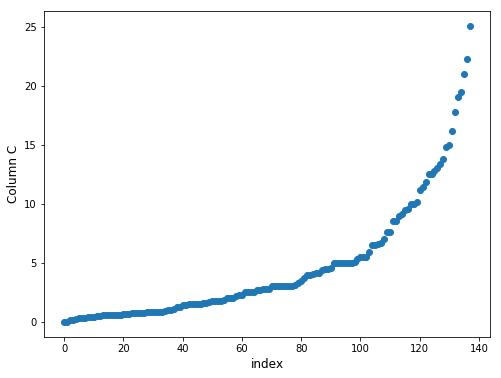

In [13]:
t = train_df['C'].isnull().sum()/552*100
print("Percentage of null values in Column B of training set "+ "{:.2f}".format(t))
print("Percentage of null values in Column B of test set "+ "{:.2f}".format(test_df['C'].isnull().sum()/138*100))
print("\n\n Distribution of training set data \n\n")

plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.C.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Column C', fontsize=12)
plt.show()

print("\n\n Distribution of test set data \n\n")

plt.figure(figsize=(8,6))
plt.scatter(range(test_df.shape[0]), np.sort(test_df.C.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Column C', fontsize=12)
plt.show()

Let's remove the outlier first as we can see there only few values at higher ranges

In [14]:
ulimit = np.percentile(train_df.C.values, 99)
llimit = np.percentile(train_df.C.values, 1)
train_df['C'].ix[train_df['C']>ulimit] = ulimit
train_df['C'].ix[train_df['C']<llimit] = llimit

ulimit = np.percentile(test_df.C.values, 99)
llimit = np.percentile(test_df.C.values, 1)
test_df['C'].ix[test_df['C']>ulimit] = ulimit
test_df['C'].ix[test_df['C']<llimit] = llimit

Very much similar distribution again with no null values. Let's move to next columns. 

## Column D Analysis

Percentage of null values in Column D of training set 0.91
Percentage of null values in Column D of test set 0.72


 Distribution of training set data 




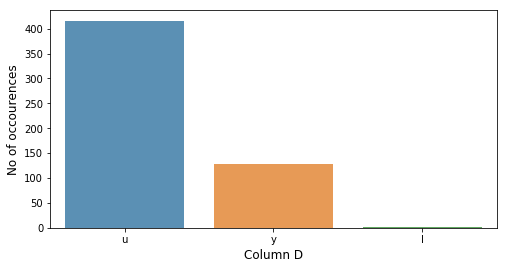



 Distribution of test set data 




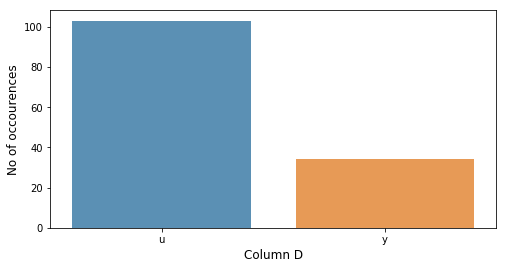

In [15]:
t = train_df['D'].isnull().sum()/552*100
print("Percentage of null values in Column D of training set "+ "{:.2f}".format(t))
print("Percentage of null values in Column D of test set "+ "{:.2f}".format(test_df['D'].isnull().sum()/138*100))
print("\n\n Distribution of training set data \n\n")
cnt_srs = train_df['D'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column D',fontsize = 12)
plt.show()

print("\n\n Distribution of test set data \n\n")
cnt_srs = test_df['D'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column D',fontsize = 12)
plt.show()

Replacing the missing values with 'u' as their are more chances of its occourences. Some of the columns of training data has "I" values in columns D but no test data has this value. So we need to remove this columns from training data. 

In [16]:
train_df['D'].fillna('u',inplace=True)
test_df['D'].fillna('u',inplace=True)

## Column E Analysis 

Percentage of null values in Column E of training set 0.91
Percentage of null values in Column E of test set 0.72


 Distribution of training set data 




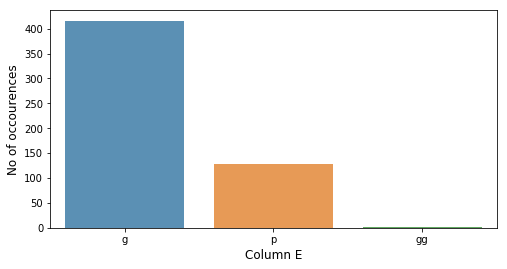



 Distribution of test set data 




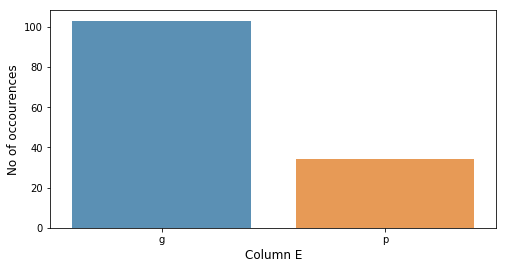

In [17]:
t = train_df['E'].isnull().sum()/552*100
print("Percentage of null values in Column E of training set "+ "{:.2f}".format(t))
print("Percentage of null values in Column E of test set "+ "{:.2f}".format(test_df['E'].isnull().sum()/138*100))
print("\n\n Distribution of training set data \n\n")
cnt_srs = train_df['E'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column E',fontsize = 12)
plt.show()

print("\n\n Distribution of test set data \n\n")
cnt_srs = test_df['E'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column E',fontsize = 12)
plt.show()

In [18]:
train_df['E'].fillna('g',inplace=True)
test_df['E'].fillna('g',inplace=True)

An imoportant observation here, that in training set of column E there are only 3 values peresent but in test set only 2 values are present. So. Let's delete it from training set. 
Keep it in mind we will delete it further with another columns having same kind of problem. 

## Column F Analysis

Percentage of null values in Column F of training set 1.27
Percentage of null values in Column F of test set 1.45


 Distribution of training set data 




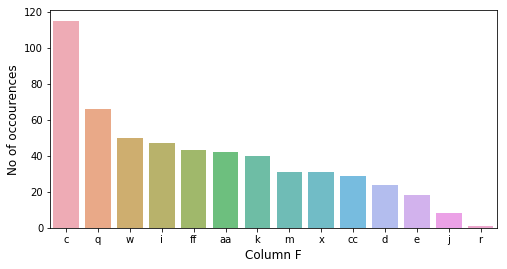



 Distribution of test set data 




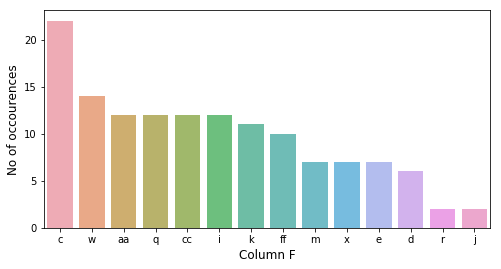

In [19]:
t = train_df['F'].isnull().sum()/552*100
print("Percentage of null values in Column F of training set "+ "{:.2f}".format(t))
print("Percentage of null values in Column F of test set "+ "{:.2f}".format(test_df['F'].isnull().sum()/138*100))
print("\n\n Distribution of training set data \n\n")
cnt_srs = train_df['F'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column F',fontsize = 12)
plt.show()

print("\n\n Distribution of test set data \n\n")
cnt_srs = test_df['F'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column F',fontsize = 12)
plt.show()

In [20]:
train_df['F'].fillna('c',inplace=True)
test_df['F'].fillna('c',inplace=True)

## Column G Analysis

Percentage of null values in Column F of training set 1.27
Percentage of null values in Column F of test set 1.45


 Distribution of training set data 




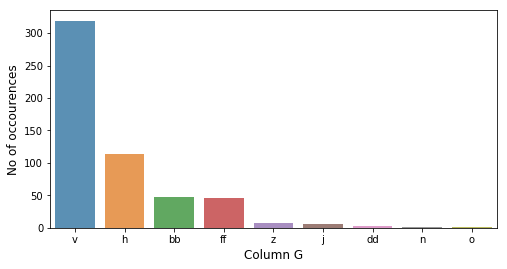



 Distribution of test set data 




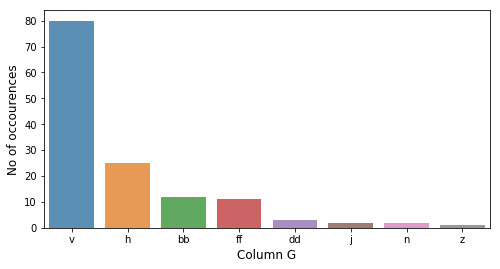

In [21]:
t = train_df['G'].isnull().sum()/552*100
print("Percentage of null values in Column F of training set "+ "{:.2f}".format(t))
print("Percentage of null values in Column F of test set "+ "{:.2f}".format(test_df['G'].isnull().sum()/138*100))
print("\n\n Distribution of training set data \n\n")
cnt_srs = train_df['G'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column G',fontsize = 12)
plt.show()

print("\n\n Distribution of test set data \n\n")
cnt_srs = test_df['G'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column G',fontsize = 12)
plt.show()

Here few of the categories are present in training set only, but not present in test set. Let's delete those. 

In [22]:
train_df = train_df[train_df['E']!='gg']
train_df = train_df[train_df['G']!='o']
train_df = train_df[train_df['D']!='I']
train_df.shape

(549, 17)

In [24]:
train_df['G'].fillna('v',inplace=True)
test_df['G'].fillna('v',inplace=True)

## Column H Analysis

Percentage of null values in Column H of training set 0.00
Percentage of null values in Column H of test set 0.00


 Distribution of training set data 




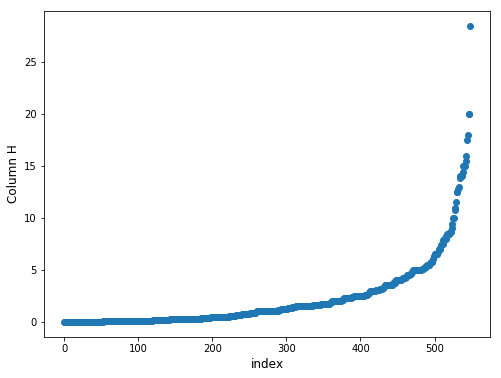



 Distribution of test set data 




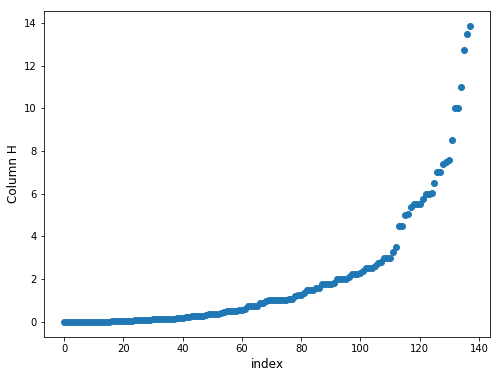

In [25]:
t = train_df['H'].isnull().sum()/552*100
print("Percentage of null values in Column H of training set "+ "{:.2f}".format(t))
print("Percentage of null values in Column H of test set "+ "{:.2f}".format(test_df['H'].isnull().sum()/138*100))
print("\n\n Distribution of training set data \n\n")

plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.H.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Column H', fontsize=12)
plt.show()

print("\n\n Distribution of test set data \n\n")

plt.figure(figsize=(8,6))
plt.scatter(range(test_df.shape[0]), np.sort(test_df.H.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Column H', fontsize=12)
plt.show()



 Distribution of training set data  after outlier removal 




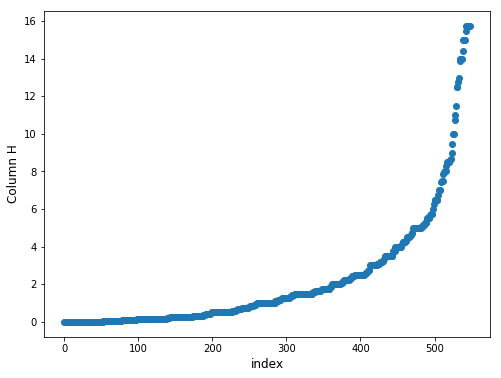



 Distribution of test set data 




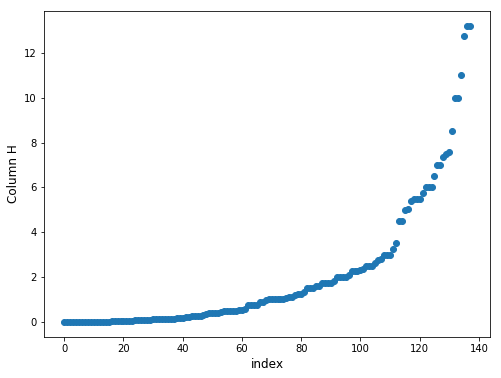

In [37]:
print("\n\n Distribution of training set data  after outlier removal \n\n")

plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.H.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Column H', fontsize=12)
plt.show()

print("\n\n Distribution of test set data \n\n")

plt.figure(figsize=(8,6))
plt.scatter(range(test_df.shape[0]), np.sort(test_df.H.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Column H', fontsize=12)
plt.show()

In [26]:
ulimit = np.percentile(train_df.H.values, 99)
llimit = np.percentile(train_df.H.values, 1)
train_df['H'].ix[train_df['H']>ulimit] = ulimit
train_df['H'].ix[train_df['H']<llimit] = llimit

ulimit = np.percentile(test_df.H.values, 99)
llimit = np.percentile(test_df.H.values, 1)
test_df['H'].ix[test_df['H']>ulimit] = ulimit
test_df['H'].ix[test_df['H']<llimit] = llimit


## Column I Analysis

Percentage of null values in Column I of training set 0.00
Percentage of null values in Column I of test set 0.00


 Distribution of training set data 




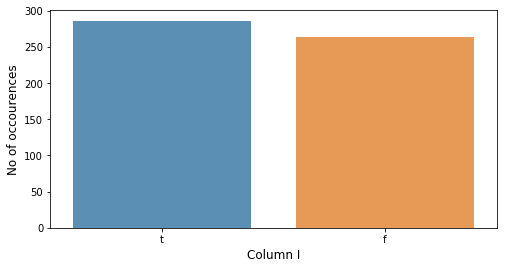



 Distribution of test set data 




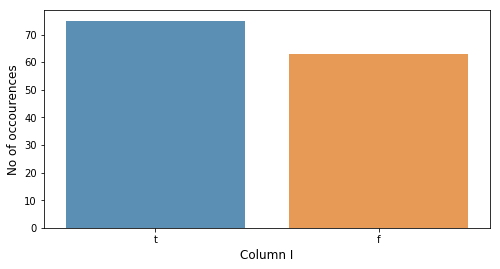

In [28]:
t = train_df['I'].isnull().sum()/552*100
print("Percentage of null values in Column I of training set "+ "{:.2f}".format(t))
print("Percentage of null values in Column I of test set "+ "{:.2f}".format(test_df['I'].isnull().sum()/138*100))
print("\n\n Distribution of training set data \n\n")
cnt_srs = train_df['I'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column I',fontsize = 12)
plt.show()

print("\n\n Distribution of test set data \n\n")
cnt_srs = test_df['I'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column I',fontsize = 12)
plt.show()

## Column J Analysis

Percentage of null values in Column I of training set 0.00
Percentage of null values in Column I of test set 0.00


 Distribution of training set data 




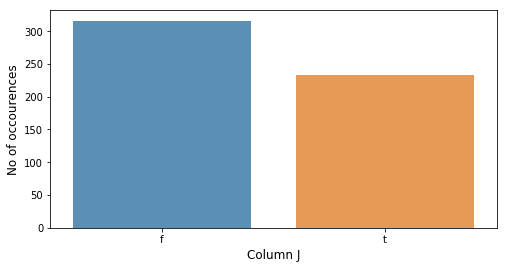



 Distribution of test set data 




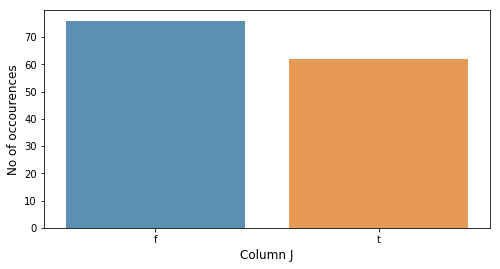

In [29]:
t = train_df['J'].isnull().sum()/552*100
print("Percentage of null values in Column I of training set "+ "{:.2f}".format(t))
print("Percentage of null values in Column I of test set "+ "{:.2f}".format(test_df['J'].isnull().sum()/138*100))
print("\n\n Distribution of training set data \n\n")
cnt_srs = train_df['J'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column J',fontsize = 12)
plt.show()

print("\n\n Distribution of test set data \n\n")
cnt_srs = test_df['J'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column J',fontsize = 12)
plt.show()

## Column K Analysis

Percentage of null values in Column K of training set 0.00
Percentage of null values in Column K of test set 0.00


 Distribution of training set data 




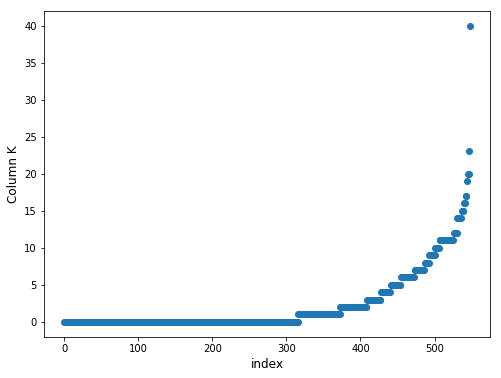



 Distribution of test set data 




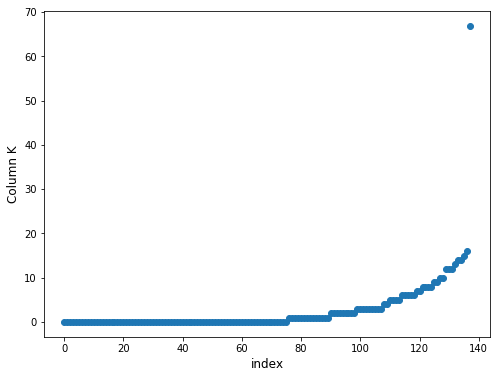

In [30]:
t = train_df['K'].isnull().sum()/552*100
print("Percentage of null values in Column K of training set "+ "{:.2f}".format(t))
print("Percentage of null values in Column K of test set "+ "{:.2f}".format(test_df['K'].isnull().sum()/138*100))
print("\n\n Distribution of training set data \n\n")

plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.K.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Column K', fontsize=12)
plt.show()

print("\n\n Distribution of test set data \n\n")

plt.figure(figsize=(8,6))
plt.scatter(range(test_df.shape[0]), np.sort(test_df.K.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Column K', fontsize=12)
plt.show()

Some of the columns are appeared to have outlier values. Let's remove these **outlier** columns. 

In [36]:
train_df.loc[train_df['K']>25,'K']=25
test_df.loc[test_df['K']>25,'K']=25

## Column L Analysis

Percentage of null values in Column L of training set 0.00
Percentage of null values in Column L of test set 0.00


 Distribution of training set data 




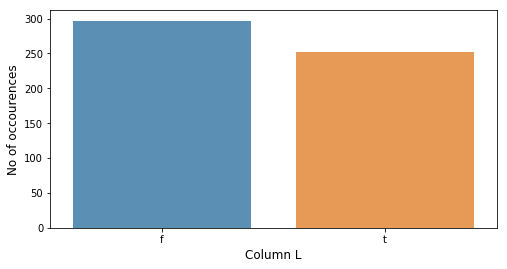



 Distribution of test set data 




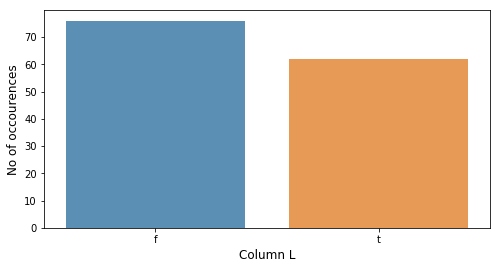

In [31]:
t = train_df['L'].isnull().sum()/552*100
print("Percentage of null values in Column L of training set "+ "{:.2f}".format(t))
print("Percentage of null values in Column L of test set "+ "{:.2f}".format(test_df['L'].isnull().sum()/138*100))
print("\n\n Distribution of training set data \n\n")
cnt_srs = train_df['L'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column L',fontsize = 12)
plt.show()

print("\n\n Distribution of test set data \n\n")
cnt_srs = test_df['L'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column L',fontsize = 12)
plt.show()

## Column M Analysis 

Percentage of null values in Column I of training set 0.00
Percentage of null values in Column I of test set 0.00


 Distribution of training set data 




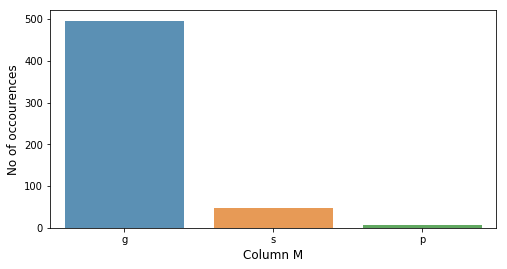



 Distribution of test set data 




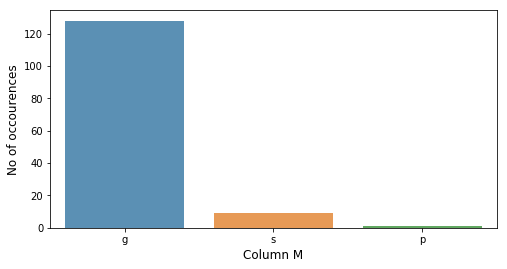

In [32]:
t = train_df['M'].isnull().sum()/552*100
print("Percentage of null values in Column I of training set "+ "{:.2f}".format(t))
print("Percentage of null values in Column I of test set "+ "{:.2f}".format(test_df['I'].isnull().sum()/138*100))
print("\n\n Distribution of training set data \n\n")
cnt_srs = train_df['M'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column M',fontsize = 12)
plt.show()

print("\n\n Distribution of test set data \n\n")
cnt_srs = test_df['M'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index,cnt_srs.values,alpha=0.8)
plt.ylabel('No of occourences',fontsize=12)
plt.xlabel('Column M',fontsize = 12)
plt.show()

## Column N Analysis

Percentage of null values in Column N of training set 1.99
Percentage of null values in Column N of test set 1.45


 Distribution of training set data 




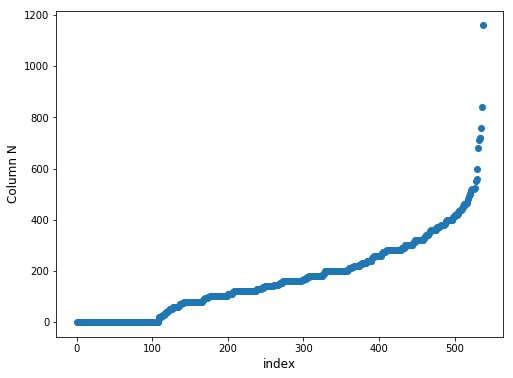



 Distribution of test set data 




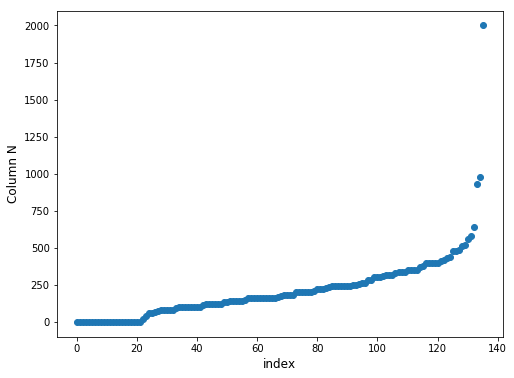

In [33]:
t = train_df['N'].isnull().sum()/552*100
print("Percentage of null values in Column N of training set "+ "{:.2f}".format(t))
print("Percentage of null values in Column N of test set "+ "{:.2f}".format(test_df['N'].isnull().sum()/138*100))
print("\n\n Distribution of training set data \n\n")

plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.N.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Column N', fontsize=12)
plt.show()

print("\n\n Distribution of test set data \n\n")

plt.figure(figsize=(8,6))
plt.scatter(range(test_df.shape[0]), np.sort(test_df.N.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Column N', fontsize=12)
plt.show()

Few null values and few outlier. Let's replace these outlier values. 

In [34]:
ulimit = np.percentile(train_df.N.values, 99)
llimit = np.percentile(train_df.N.values, 1)
train_df['N'].ix[train_df['N']>ulimit] = ulimit
train_df['N'].ix[train_df['N']<llimit] = llimit

ulimit = np.percentile(test_df.N.values, 99)
llimit = np.percentile(test_df.N.values, 1)
test_df['N'].ix[test_df['N']>ulimit] = ulimit
test_df['N'].ix[test_df['N']<llimit] = llimit

#train_df.loc[train_df['N']>1000,'N']=900
#test_df.loc[test_df['N']>1100,'N']=1000
train_df['N'].fillna(train_df['N'].median(),inplace=True)
test_df['N'].fillna(test_df['N'].median(),inplace=True)

## Column O Analysis

Percentage of null values in Column O of training set 0.00
Percentage of null values in Column O of test set 0.00


 Distribution of training set data 




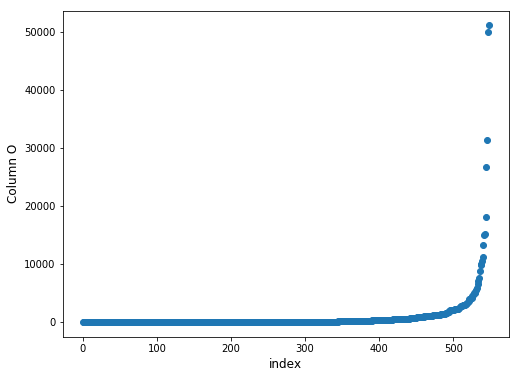



 Distribution of test set data 




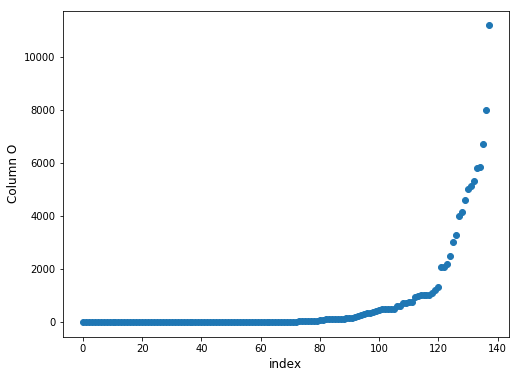

In [35]:
t = train_df['O'].isnull().sum()/552*100
print("Percentage of null values in Column O of training set "+ "{:.2f}".format(t))
print("Percentage of null values in Column O of test set "+ "{:.2f}".format(test_df['O'].isnull().sum()/138*100))
print("\n\n Distribution of training set data \n\n")

plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.O.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Column O', fontsize=12)
plt.show()

print("\n\n Distribution of test set data \n\n")

plt.figure(figsize=(8,6))
plt.scatter(range(test_df.shape[0]), np.sort(test_df.O.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Column O', fontsize=12)
plt.show()

So many outliers are here. Need to devise a method to replace these. 

In [38]:
ulimit = np.percentile(train_df.N.values, 99)
llimit = np.percentile(train_df.N.values, 1)
train_df['O'].ix[train_df['O']>ulimit] = ulimit
train_df['O'].ix[train_df['O']<llimit] = llimit

ulimit = np.percentile(test_df.N.values, 99)
llimit = np.percentile(test_df.N.values, 1)
test_df['O'].ix[test_df['O']>ulimit] = ulimit
test_df['O'].ix[test_df['O']<llimit] = llimit

#train_df.loc[train_df['N']>1000,'N']=900
#test_df.loc[test_df['N']>1100,'N']=1000
train_df['O'].fillna(train_df['O'].median(),inplace=True)
test_df['O'].fillna(test_df['O'].median(),inplace=True)

So, till now what we have obserevd is - 
**Column P** - Not skewed dataset, binary classification based.
**Column A** - 1.45% of training data values are null and 2.90% of test data. So fill these values with variable whose frequency is more.
**Column B** - Remove the null values whith variable whose frequency is more. 
**Column C** - No null values few are outlier only. Remove that.
**Column D** - There are few values which are present in training  data but not in test. So need to remove those values from training data. .
**Column E** - Again same as Column D. Few of the categorical values are presnt in training data but not in test data. 
**Column F and column G** - Many categorical values.
** Column H ** - Only need to remove outliers. 
**Column I** - No null values and perfect data.
**Column J** - No null values and perfect data. 
**Column K** - Remove outliers and proceed.
** Column L and Column M** - Perfect data
** Column N** - remove outliers and fill the null values.
** Column O** - Many outliers are present remove them and look the result.

In [39]:
train_df.head()


,id,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P
0,1,b,18.42,10.415,y,p,aa,v,0.125,t,f,0,f,g,120.0,375.0,1
1,2,a,21.75,11.750,u,g,c,v,0.250,f,f,0,t,g,180.0,0.0,1
2,3,b,30.17,1.085,y,p,c,v,0.040,f,f,0,f,g,170.0,179.0,1
3,4,b,22.67,2.540,y,p,c,h,2.585,t,f,0,f,g,0.0,0.0,0
4,5,a,36.00,1.000,u,g,c,v,2.000,t,t,11,f,g,0.0,456.0,0


In few of the columns let's do label encoding and in remaining others let's do one-hot encoding.

In [40]:
train_df.reset_index(drop=True,inplace=True)
train_df.index

RangeIndex(start=0, stop=549, step=1)

**"ID"** variables are not needed. Let's delete it. 

In [41]:
train_df.drop('id',axis=1,inplace=True)
test_df.drop('id',axis=1,inplace=True)

**Let's do the label encoding**

In [42]:
cols = ['A','D','E','I','J','L','F','G','M']
from sklearn.preprocessing import LabelEncoder
for x in cols:
    lbl = LabelEncoder()
    train_df[x]=lbl.fit_transform(train_df[x])
    test_df[x]=lbl.fit_transform(test_df[x])
   

In [85]:
# train_df = pd.get_dummies(train_df,prefix = ['F','G'])
# test_df = pd.get_dummies(test_df,prefix = ['F','G'])

In [43]:
y = train_df['P'].values
X = train_df.drop('P',axis=1,inplace=True)
X = train_df.values

**Logistic Regression**

In [44]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
Test = sc.fit_transform(test_df.values)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
precision = cm[0][0]/(cm[0][0]+cm[0][1])
recall = cm[0][0]/(cm[0][0]+cm[1][0])
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall :",recall)
y_pred_sub = classifier.predict(Test)

test_data = pd.read_csv('../input/datasete9dc3ed/dataset/test.csv')
test_data['id'].values

df = pd.DataFrame({'id':test_data['id'].values,'P':y_pred_sub})
filename = 'submissison_logistic_regression.csv'
df.to_csv(filename, index=False)

Accuracy:  0.8272727272727273
Precision:  0.8809523809523809
Recall : 0.7254901960784313


Logistic regression is giving the score 84.78 on submitting the file. Need to apply some other algorithm. 

## XgBoost Model

In [44]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

from xgboost import XGBClassifier
classifier = XGBClassifier(learning_rate =0.1,n_estimators=60,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,
 objective= 'binary:logistic',scale_pos_weight=1,seed=27)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print(accuracies.mean())
print(accuracies.std())

y_pred_sub = classifier.predict(test_df.values)
test_data = pd.read_csv('../input/datasete9dc3ed/dataset/test.csv')
test_data['id'].values

df = pd.DataFrame({'id':test_data['id'].values,'P':y_pred_sub})
filename = 'submissison_XGBOOST.csv'
df.to_csv(filename, index=False,columns =['id','P'])

1. This is giving the leaderboard score 86.85. Let's do anything else

In [45]:
# train = train_df.drop(['F','G'],axis=1)
# test = test_df.drop(['F','G'],axis = 1)

## KNN

In [45]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

y_pred_sub = classifier.predict(Test)
test_data = pd.read_csv('../input/datasete9dc3ed/dataset/test.csv')
test_data['id'].values

df = pd.DataFrame({'id':test_data['id'].values,'P':y_pred_sub})
filename = 'submissison_KNN.csv'
df.to_csv(filename, index=False,columns = ['id','P'])

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
precision = cm[0][0]/(cm[0][0]+cm[0][1])
recall = cm[0][0]/(cm[0][0]+cm[1][0])
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall :",recall)

[[40 16]
 [13 69]]
Accuracy:  0.7898550724637681
Precision:  0.7142857142857143
Recall : 0.7547169811320755


LeaderBoard Score - 86.95

**SVM**

In [47]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

y_pred_sub = classifier.predict(Test)
test_data = pd.read_csv('../input/datasete9dc3ed/dataset/test.csv')
test_data['id'].values

df = pd.DataFrame({'id':test_data['id'].values,'P':y_pred_sub})
filename = 'submissison_SVM.csv'
df.to_csv(filename, index=False,columns = ['id','P'])

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
precision = cm[0][0]/(cm[0][0]+cm[0][1])
recall = cm[0][0]/(cm[0][0]+cm[1][0])
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall :",recall)

**Decision Tree**

In [46]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

y_pred_sub = classifier.predict(Test)
test_data = pd.read_csv('../input/datasete9dc3ed/dataset/test.csv')
test_data['id'].values

df = pd.DataFrame({'id':test_data['id'].values,'P':y_pred_sub})
filename = 'submissison_DecisionTREE.csv'
df.to_csv(filename, index=False,columns = ['id','P'])

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
precision = cm[0][0]/(cm[0][0]+cm[0][1])
recall = cm[0][0]/(cm[0][0]+cm[1][0])
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall :",recall)

[[46 10]
 [19 63]]
Accuracy:  0.7898550724637681
Precision:  0.8214285714285714
Recall : 0.7076923076923077


Leaderboard Score = 82.80

**Random Forest**

In [47]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 80, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

y_pred_sub = classifier.predict(Test)
test_data = pd.read_csv('../input/datasete9dc3ed/dataset/test.csv')
test_data['id'].values

df = pd.DataFrame({'id':test_data['id'].values,'P':y_pred_sub})
filename = 'submissison_RandomForest.csv'
df.to_csv(filename, index=False,columns = ['id','P'])

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
precision = cm[0][0]/(cm[0][0]+cm[0][1])
recall = cm[0][0]/(cm[0][0]+cm[1][0])
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall :",recall)


[[48  8]
 [14 68]]
Accuracy:  0.8405797101449275
Precision:  0.8571428571428571
Recall : 0.7741935483870968


Random Forest - 88.40

All these are not very good results need to **Model Stacking**.  

## Stacking Models

In [52]:
import re
import sklearn
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Going to use these 5 base models for the stacking
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.svm import SVC
from sklearn.cross_validation import KFold

In [53]:
# Some useful parameters which will come in handy later on
ntrain = train_df.shape[0]
ntest = test_df.shape[0]
SEED = 0 # for reproducibility
NFOLDS = 5 # set folds for out-of-fold prediction
kf = KFold(ntrain, n_folds= NFOLDS, random_state=SEED)

# Class to extend the Sklearn classifier
class SklearnHelper(object):
    def __init__(self, clf, seed=0, params=None):
        params['random_state'] = seed
        self.clf = clf(**params)

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def fit(self,x,y):
        return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
        print(self.clf.fit(x,y).feature_importances_)

In [54]:
def get_oof(clf, x_train, y_train, x_test):
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.train(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

## Generating our Base First-Level Models
So now let us prepare five learning models as our first level classification. These models can all be conveniently invoked via the Sklearn library and are listed as follows:

**Random Forest classifier**
**Extra Trees classifier**
**AdaBoost classifer**
**Gradient Boosting classifer**
**Support Vector Machine**
**Parameters**

In [55]:
rf_params = {
    'n_jobs': -1,
    'n_estimators': 100,
     'warm_start': True, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':100,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 100,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 100,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025
    }

# # K Nearest Neighbors
# knn_params = {
#    'n_neighbors':5, 
#     'metric':'minkowski', 
#     'p':2 
# }

In [56]:
# Create 5 objects that represent our 4 models
rf = SklearnHelper(clf=RandomForestClassifier, seed=0, params=rf_params)
et = SklearnHelper(clf=ExtraTreesClassifier, seed=0, params=et_params)
ada = SklearnHelper(clf=AdaBoostClassifier, seed=0, params=ada_params)
gb = SklearnHelper(clf=GradientBoostingClassifier, seed=0, params=gb_params)
svc = SklearnHelper(clf=SVC, seed=0, params=svc_params)
#knn = SklearnHelper(clf=KNeighborsClassifier,seed=0,params=Knn_params )

In [57]:
y_train = y
x_train = train_df.values
x_test = test_df.values

## Output of the First level Predictions

We now feed the training and test data into our 5 base classifiers and use the Out-of-Fold prediction function we defined earlier to generate our first level predictions. Allow a handful of minutes for the chunk of code below to run.

In [58]:
# Create our OOF train and test predictions. These base results will be used as new features
et_oof_train, et_oof_test = get_oof(et, x_train, y_train, x_test) # Extra Trees
rf_oof_train, rf_oof_test = get_oof(rf,x_train, y_train, x_test) # Random Forest
ada_oof_train, ada_oof_test = get_oof(ada, x_train, y_train, x_test) # AdaBoost 
gb_oof_train, gb_oof_test = get_oof(gb,x_train, y_train, x_test) # Gradient Boost
svc_oof_train, svc_oof_test = get_oof(svc,x_train, y_train, x_test) # Support Vector Classifier

print("Training is complete")

## Feature importances generated from the different classifiers

In [60]:
rf_feature = rf.feature_importances(x_train,y_train)
et_feature = et.feature_importances(x_train, y_train)
ada_feature = ada.feature_importances(x_train, y_train)
gb_feature = gb.feature_importances(x_train,y_train)

In [61]:
rf_features = [0.00536159, 0.05382157, 0.05883195, 0.01128306, 0.01043449, 0.04330847,
 0.02027282, 0.08969713, 0.34590617, 0.07571752, 0.10548025, 0.00759318,
 0.0059483, 0.05952361, 0.10681989]
et_features = [0.00765894, 0.01565057, 0.02315816, 0.01216146, 0.01294874, 0.02590255,
0.01545477, 0.03878369, 0.49332144, 0.15651283, 0.06571876, 0.01063308,0.00939666,
0.02256081, 0.09013754]
ada_features = [0. ,0.276, 0.17,0.004, 0.004, 0.074, 0.014, 0.078, 0.032, 0.002, 0.026,
               0. , 0.01,0.274, 0.036]
gb_features = [0.00991886, 0.1272193,  0.08191837, 0.0046277,  0.00426963, 0.04296519,
 0.01436642, 0.06608825, 0.04460322, 0.00820816, 0.02075981, 0.00404481,
 0.00870869, 0.07683344, 0.05746817]

In [62]:
cols = train_df.columns.values
# Create a dataframe with features
feature_dataframe = pd.DataFrame( {'features': cols,
     'Random Forest feature importances': rf_features,
     'Extra Trees  feature importances': et_features,
      'AdaBoost feature importances': ada_features,
    'Gradient Boost feature importances': gb_features
    })

In [64]:
feature_dataframe['mean'] = feature_dataframe.mean(axis= 1) # axis = 1 computes the mean row-wise
feature_dataframe

Using different classifiers found that **Column I**, **Column B** and** Column N** are top important features. 

# Second-Level Predictions from the First-level Output
## First-level output as new features

Having now obtained our first-level predictions, one can think of it as essentially building a new set of features to be used as training data for the next classifier. As per the code below, we are therefore having as our new columns the first-level predictions from our earlier classifiers and we train the next classifier on this.

In [65]:
base_predictions_train = pd.DataFrame( {'RandomForest': rf_oof_train.ravel(),
     'ExtraTrees': et_oof_train.ravel(),
     'AdaBoost': ada_oof_train.ravel(),
      'GradientBoost': gb_oof_train.ravel()
    })
base_predictions_train.head()

In [66]:
x_train = np.concatenate(( et_oof_train, rf_oof_train, ada_oof_train, gb_oof_train, svc_oof_train), axis=1)
x_test = np.concatenate(( et_oof_test, rf_oof_test, ada_oof_test, gb_oof_test, svc_oof_test), axis=1)

In [67]:
x_test

## Second level learning model via XGBoost


In [68]:
gbm = xgb.XGBClassifier(
    #learning_rate = 0.02,
 n_estimators= 100,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread= -1,
 scale_pos_weight=1).fit(x_train, y_train)
predictions = gbm.predict(x_test)

In [69]:
test_data = pd.read_csv('../input/datasete9dc3ed/dataset/test.csv')
test_data['id'].values

df = pd.DataFrame({'id':test_data['id'].values,'P':predictions})
filename = 'submissison_stacked_XGBOOST.csv'
df.to_csv(filename, index=False,columns =['id','P'])